# **Problem Statement:**

* In today's increasingly health-conscious society, accurately **tracking and managing calorie expenditure** during physical activities is crucial for individuals striving to maintain or improve their fitness levels. However, existing methods for estimating calorie burn rates often lack precision and may not account for various individual factors.
* Therefore, there is a need for a reliable predictive model that can accurately estimate calorie expenditure based on input variables such as **activity type, duration, intensity, and user biometric data**. Developing such a model would not only empower individuals to make more informed decisions regarding their fitness goals but also enhance the effectiveness of fitness tracking applications and devices in promoting healthier lifestyles.



Importing Dependencies

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

**Data Collection and Processing.**

Collection: Kaggle Calories Dataset

In [203]:
calories = pd.read_csv('/content/calories.csv')

In [204]:
calories.sample(5)

,User_ID,Calories
11327,19688237,22.0
6240,17545969,300.0
11909,15712081,213.0
12551,15035775,22.0
2131,18472777,3.0


In [205]:
exercise = pd.read_csv('/content/exercise.csv')

In [206]:
exercise.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
6033,15973490,female,43,164.0,61.0,12.0,94.0,39.8
7343,17695838,male,43,172.0,74.0,18.0,92.0,40.0
7214,15717919,male,64,191.0,94.0,15.0,99.0,40.4
4044,15982368,female,42,157.0,59.0,24.0,97.0,40.6
7451,13541758,male,57,204.0,114.0,11.0,82.0,39.5


In [207]:
data = pd.concat([exercise, calories['Calories']], axis=1)

In [208]:
data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4898,17242181,female,24,179.0,68.0,16.0,101.0,40.1,87.0
1634,10953410,female,54,167.0,65.0,1.0,80.0,37.6,4.0
5960,19149142,male,23,182.0,82.0,23.0,109.0,40.7,141.0
12984,13818946,male,21,186.0,89.0,22.0,101.0,40.4,110.0
5289,10732583,female,67,169.0,66.0,28.0,108.0,40.5,195.0


In [209]:
data.shape

(15000, 9)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [211]:
data['Gender'] = data['Gender'].astype('category')
data['User_ID'] = data['User_ID'].astype(np.int32)
data['Age'] = data['Age'].astype(np.int8)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   User_ID     15000 non-null  int32   
 1   Gender      15000 non-null  category
 2   Age         15000 non-null  int8    
 3   Height      15000 non-null  float64 
 4   Weight      15000 non-null  float64 
 5   Duration    15000 non-null  float64 
 6   Heart_Rate  15000 non-null  float64 
 7   Body_Temp   15000 non-null  float64 
 8   Calories    15000 non-null  float64 
dtypes: category(1), float64(6), int32(1), int8(1)
memory usage: 791.3 KB


**Analysis**

In [212]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Data Visulaization**

In [213]:
sns.set()

<ipython-input-214-5b4042c92f83>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gender'], palette='hls')


Text(0.5, 1.0, 'Count of Individuals by Gender')

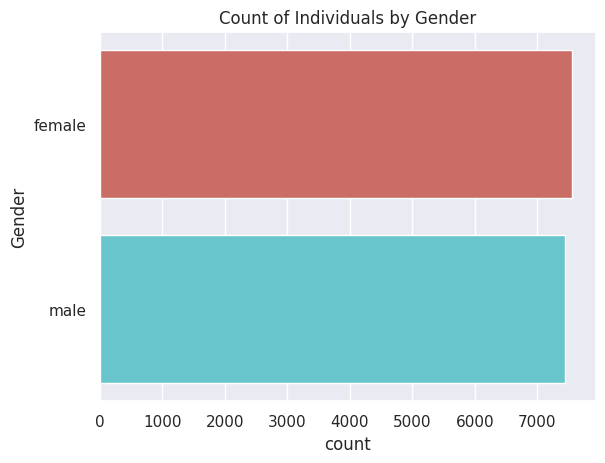

In [214]:
sns.countplot(data['Gender'], palette='hls')
plt.title('Count of Individuals by Gender')

<Axes: xlabel='Age', ylabel='Count'>

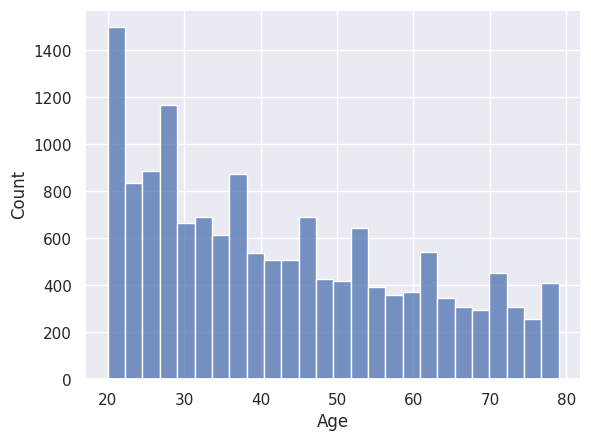

In [215]:
sns.histplot(data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

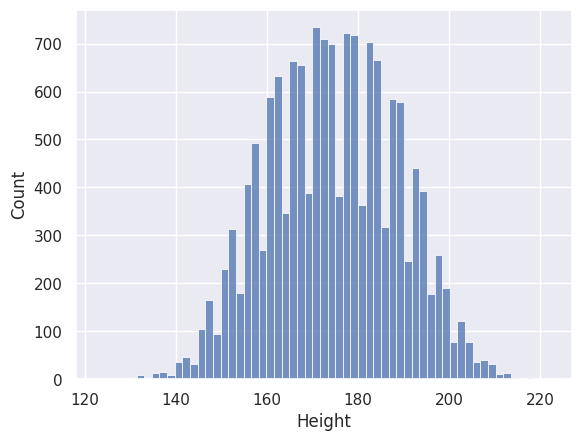

In [216]:
sns.histplot(data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

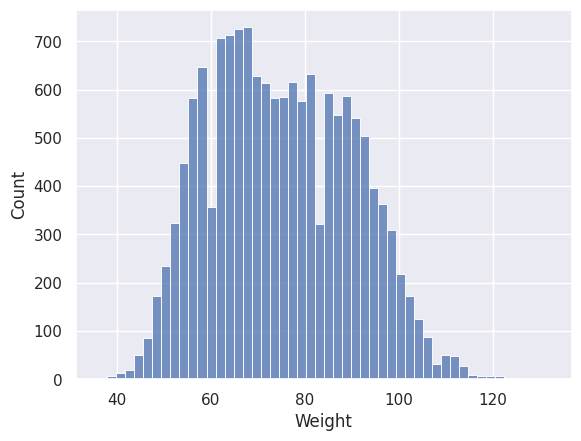

In [217]:
sns.histplot(data['Weight'])

<Axes: xlabel='Duration', ylabel='Count'>

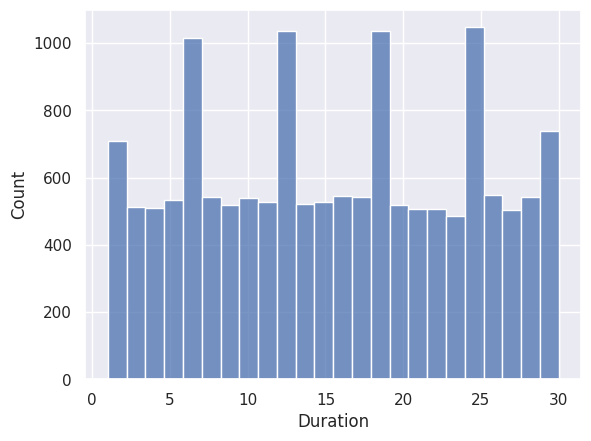

In [218]:
sns.histplot(data['Duration'])

<Axes: xlabel='Heart_Rate', ylabel='Count'>

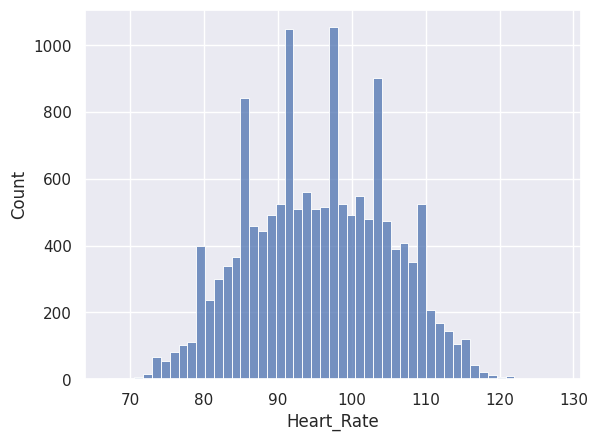

In [219]:
sns.histplot(data['Heart_Rate'])

<Axes: xlabel='Body_Temp', ylabel='Count'>

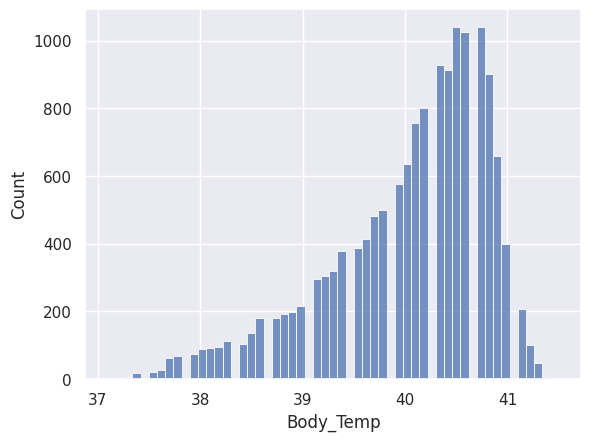

In [220]:
sns.histplot(data['Body_Temp'])

<Axes: xlabel='Calories', ylabel='Count'>

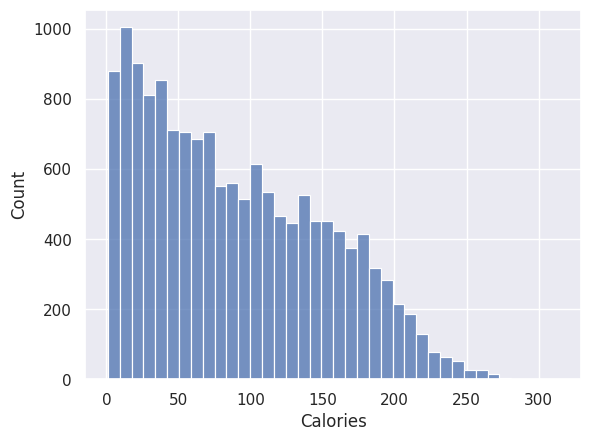

In [221]:
sns.histplot(data['Calories'])

In [222]:
correlation = data.corr()

<ipython-input-222-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

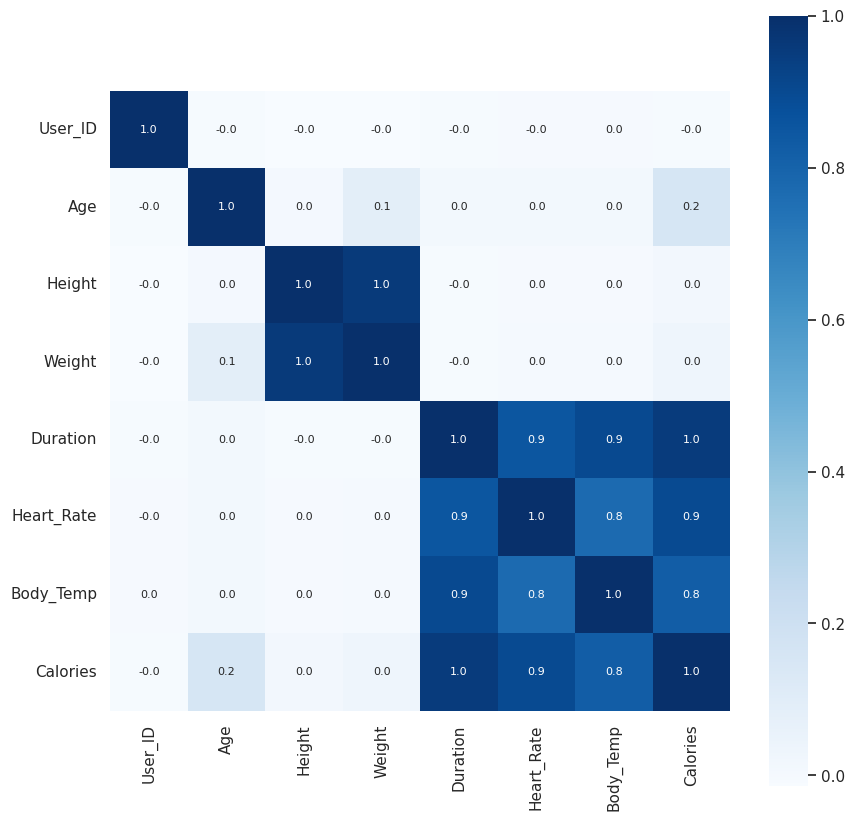

In [223]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

**Data Preprocessing**

In [224]:
data['Gender'] = data['Gender'].apply(lambda x: int(x == 'male'))

In [225]:
data['Gender'] = data['Gender'].astype(np.int8)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int32  
 1   Gender      15000 non-null  int8   
 2   Age         15000 non-null  int8   
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int32(1), int8(2)
memory usage: 791.1 KB


In [227]:
data.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
4229,15157306,1,66,198.0,96.0,6.0,86.0,39.1,30.0
260,19475479,0,32,172.0,72.0,8.0,80.0,39.5,26.0
5098,14268261,0,67,167.0,71.0,21.0,98.0,40.3,122.0
1330,17045391,1,32,196.0,95.0,19.0,98.0,40.4,99.0
13597,16096253,1,32,184.0,93.0,11.0,84.0,39.7,34.0


**Feature and Target Separation**

In [228]:
X = data.drop(['User_ID', 'Calories'], axis=1)
Y = data['Calories']

In [229]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [230]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

**Splitting data in Training and Testing Data**

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [232]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (11250, 7) (3750, 7)


**Model Training**

In [233]:
# loading model

model = XGBRegressor()

In [234]:
# training model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

In [235]:
test_data_prediction = model.predict(X_test)

In [236]:
test_data_prediction

array([129.81114  ,  55.23725  ,   8.9705105, ...,  45.34277  ,
       115.421684 ,  12.285342 ], dtype=float32)

**Metric Calculation**

MAE (Mean Absolute Error)

In [237]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [238]:
print('Mean Absolute Error (MAE) = ', mae)

Mean Absolute Error (MAE) =  1.4296302476286888


In [239]:
mean_calorie_burnt = data['Calories'].mean()
mean_calorie_burnt

89.53953333333334

In [240]:
print('Accuracy =', str(round(100.0 - (mae/mean_calorie_burnt*100), 2)) + '%')

Accuracy = 98.4%
